<a href="https://colab.research.google.com/github/Jiisou/Data-Pattern-Recognition/blob/main/DPA_%EC%9E%A5%EC%A7%80%EC%88%98_TermProject_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Brain Tumor MRI Image Classification <Malignant/Benign>**

**1) 프로젝트 motivation**

이미지 처리에 관심을 가지고 대표적인 이미지 처리 네트웤인 CNN의 발전과정에 대해 심층 학습 후 구현해보고자 하였습니다.
와중에 병리이미지 패턴 인식에 대한 특강을 진행해주신 강유채 교수님의 수업을 들으며 병리 이미지 classification task를 수행하는 딥러닝 모델을 설계해보고자 하게 되었습니다.

이에 가장 기본이 되는 CNN과 발전한 형태인 googLeNet 또는 VGGnet의 성능을 직접 비교해보는 것이 가장 큰 목표였습니다.

**2) 프로그램의 데이터 패턴 종류**
: 이미지 프레임 데이터를 사용하였습니다

**3) 데이터 수집 과정 및 augmentation 사용 기술**
: tensorflow.keras.ImageDataGenerator 라이브러리를 활용하여 이미지 데이터 증강기법을 적용하였습니다.

해당 라이브러리는 이미지 파일을 배열 형태로 전환하여 0~255 사이의 값으로 정규화된 배열로 변환합니다.
학습용과 검증용 데이터 제너레이터 객체를 따로 정의해 사용하였습니다.

**4) 전이학습 또는 타인의 데이터를 추가한 경우, 해당 데이터에 대한 설명**

- 타인의 데이터(kaggle datasets)을 기반으로 증강 기법을 적용하였습니다 : https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection


**5) 데이터의 크기 및 개수, 용량 데이터 크기의 타당성 (딥러닝 가능성)**

기반이 되는 원본 데이터셋의 크기는 253개로, 훈련에 203개, 테스트에 50개가 사용됩니다. 원본 이미지의 사이즈는 제각각 이지만 인풋 사이즈는 동일하게 150x150 픽셀로 들어가도록 조정하였습니다.

일반적으로 딥러닝 모델을 훈련하려면 수천 개 이상의 이미지가 필요합니다. 현재 203개의 훈련 이미지는 매우 적은 수입니다.
이러한 문제를 극복하기 위해 증강 기법을 사용합니다. ImageDataGenerator를 통해 실제 데이터셋의 크기를 증가시키지 않지만, 훈련 중에 무한히 많은 변형된 이미지를 생성할 수 있습니다. 이를 통해 데이터셋의 다양성을 높이고 모델의 일반화 성능을 향상시키며 과적합을 방지할 수 있습니다.

병리 이미지의 특성상 법적 규제와 관련하여 자유롭게 배포되는 데이터 규모에 한계가 있으므로 딥러닝이 적용되기에 충분한 크기의 데이터셋을 확보하였다고 하긴 어렵지만 augmentation 기술을 최대한 활용함으로써 극복하고자 하였습니다.

# 데이터 불러오기

In [ ]:
# 이미지 데이터 업로드해둔 원격 GitHub 레포지토리 클론
!git clone https://github.com/Jiisou/Data-Pattern-Recognition.git
# 이미지 데이터 경로 설정
data_path = '/content/Data-Pattern-Recognition/brain_tumor_dataset'

fatal: destination path 'Data-Pattern-Recognition' already exists and is not an empty directory.


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 데이터 증강

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator 객체 선언 (옵션 정의)
gen = ImageDataGenerator(rescale=1./255,        # 크기 재조절 인수
                         validation_split=0.2,  # 데이터의 20%를 검증 데이터로 사용
                         rotation_range=20,     # 이미지 회전 각도 설정
                         width_shift_range=0.2, # 0~1 부동 소수점을 인풋으로 받아 가로 비율 좌우로 이동
                         height_shift_range=0.2,# 0~1 부동 소수점을 인풋으로 세로 비율 상하로 이동
                         shear_range=0.2,       # 0~1 부동 소수점 인풋으로 반시계방향으로 층 밀리기 강도
                         zoom_range=0.2,        # 0~1 부동 소수점 인풋 > 확대 비율
                         horizontal_flip=True,  # 좌우 반전 true/false
                         fill_mode='nearest')   # 경계 바깥을 채워줌.

In [ ]:
# 훈련 데이터와 테스트 데이터 생성 (flow_from_directory: 경로 내의 파일 데이터를 인풋으로 받겠다)
train_generator = gen.flow_from_directory(data_path,
                                          target_size=(150, 150),  # 모든 이미지를 150x150 크기로 조정 (입력 계층의 input_shape와 같아야 함)
                                          batch_size=50,
                                          class_mode='binary',
                                          subset='training')

test_generator = gen.flow_from_directory(data_path,
                                              target_size=(150, 150),  # 모든 이미지를 150x150 크기로 조정
                                              batch_size=50,
                                              class_mode='binary',
                                              subset='validation')

Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [ ]:
train_generator

(주의) ImageDataGenerator로 증강된 데이터셋은 keras.utils.Sequence 형태로 Wrapping됨.

따라서 내 모델을 정의하고 fit 메서드를 통해 증강한 데이터셋을 넘길 때 옵션을 적절히 수정해주어야 한다.



In [ ]:
# 각 세트의 이미지 개수 확인
print(f'Train generator batch size: {train_generator.batch_size} / total images: {train_generator.n}')
print(f' Test generator batch size: {test_generator.batch_size} / total images: {test_generator.n}')

Train generator batch size: 50 / total images: 203
 Test generator batch size: 50 / total images: 50


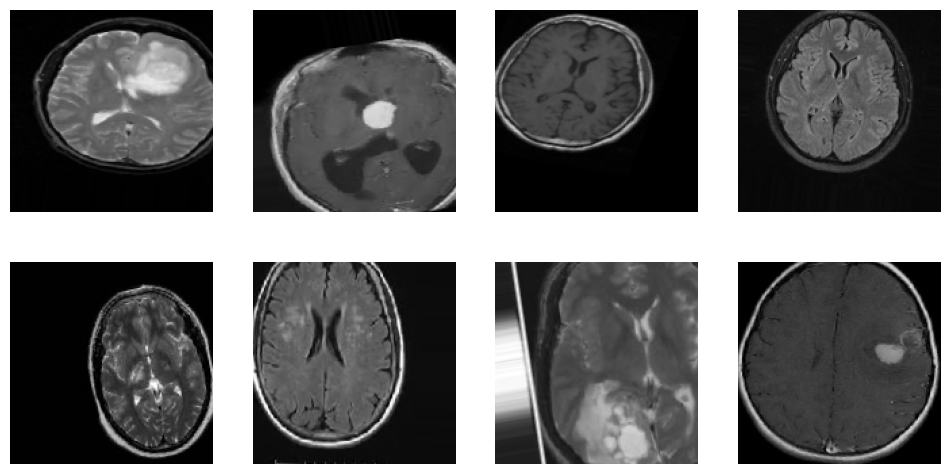

In [ ]:
# 증강된 이미지 샘플 8개 확인
x_batch, y_batch = next(train_generator) # 첫 번째 배치에서 이미지와 라벨을 추출

plt.figure(figsize=(12, 6))
for i in range(8):
  plt.subplot(2,4, i+1)
  plt.imshow(x_batch[i])
  plt.axis('off')
plt.show()

# CNN 모델 정의

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
# CNN 모델 정의
model = Sequential([Conv2D(32, kernel_size=(3, 3), input_shape=(150, 150, 3), activation='relu'), # 입력층: 3x3 크기의 32개 필터를 사용, 입력 이미지 크기는 150x150 + RGB 3채널. 활성호 함수는 ReLU
                    MaxPooling2D((2, 2)),                  # 2x2 크기의 윈도우를 사용하여 입력의 크기를 절반으로 줄임
                    Conv2D(64, (3, 3), activation='relu'), # 3x3 크기의 64개 필터 사용, 활성화 함수 ReLU
                    MaxPooling2D(pool_size=(2, 2)),        # 2x2 크기의 윈도우를 사용하여 입력의 크기를 절반으로
                    Dropout(0.25),                         # 드롭아웃 비율 25% (과적합방지)
                    Conv2D(128, kernel_size=(3, 3), activation='relu'), # 3x3 크기의 128개 필터, relu 활성화 함수
                    MaxPooling2D((2, 2)),                  # 2x2 크기의 윈도우를 사용하여 입력의 크기를 절반으로
                    Flatten(),                             # 2D 출력 -> 1D 벡터 변환
                    Dense(512, activation='relu'),         # 뉴런 512개의 fully connected layer
                    Dropout(0.5),                          # 드롭아웃 비율 50%
                    Dense(1, activation='sigmoid')         # 시그모이드 활성화 함수 for binary classification (1 or not)
])


# 모델 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# 모델 최적화 설정
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model_path = "./tumor_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
# 모델 훈련
e=50

cnn_history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps =test_generator.samples // test_generator.batch_size,
    epochs=e
)
# # 모델 훈련   # **batch 사이즈가 50 보다 커지면 원본 test dast set 크기(50)를 초과하여 나누기 결과가 0이 되는 경우가 발생할 수 있어 이를 방지하기 위해 max(1, ~~)
# history = model.fit(
#     train_generator,
#     steps_per_epoch=max(1, train_generator.samples // train_generator.batch_size),
#     validation_data=test_generator,
#     validation_steps=max(1, test_generator.samples // test_generator.batch_size),
#     epochs=30
# )

Epoch 1/30
4/4 [==============================] - 4s 450ms/step - loss: 1.3754 - accuracy: 0.5490 - val_loss: 0.7125 - val_accuracy: 0.3800
Epoch 2/30
4/4 [==============================] - 2s 395ms/step - loss: 0.7125 - accuracy: 0.4510 - val_loss: 0.6909 - val_accuracy: 0.6800
Epoch 3/30
4/4 [==============================] - 2s 397ms/step - loss: 0.6760 - accuracy: 0.6013 - val_loss: 0.6449 - val_accuracy: 0.6200
Epoch 4/30
4/4 [==============================] - 2s 377ms/step - loss: 0.6528 - accuracy: 0.6275 - val_loss: 0.6193 - val_accuracy: 0.6200
Epoch 5/30
4/4 [==============================] - 2s 398ms/step - loss: 0.6479 - accuracy: 0.6013 - val_loss: 0.6270 - val_accuracy: 0.6200
Epoch 6/30
4/4 [==============================] - 2s 504ms/step - loss: 0.6436 - accuracy: 0.6275 - val_loss: 0.5919 - val_accuracy: 0.6200
Epoch 7/30
4/4 [==============================] - 2s 516ms/step - loss: 0.6564 - accuracy: 0.5948 - val_loss: 0.5861 - val_accuracy: 0.6800
Epoch 8/30
4/4 [====

In [ ]:
best_acc_cnn = max(cnn_history.history['val_accuracy'])
print(f"Basic CNN best validation accuracy: {best_acc_cnn}")

Basic CNN best validation accuracy: 0.8199999928474426


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_224 (Conv2D)         (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_225 (Conv2D)         (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_8 (Dropout)         (None, 36, 36, 64)        0         
                                                                 
 conv2d_226 (Conv2D)         (None, 34, 34, 128)      

#결과 시각화

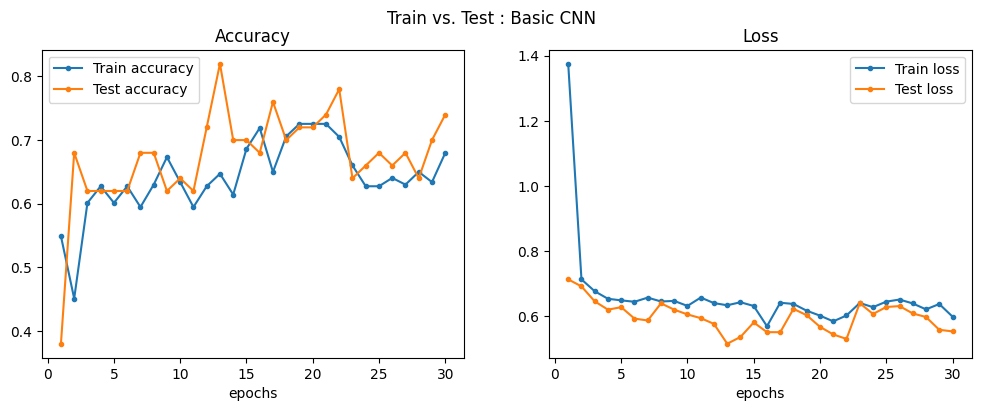

In [ ]:
# 훈련 결과 시각화
plt.figure(figsize=(12, 4))

acc     = cnn_history.history['accuracy']
loss    = cnn_history.history['loss']
val_acc = cnn_history.history['val_accuracy']
val_loss = cnn_history.history['val_loss']
epochs   = range(1, len(acc) + 1)

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, marker='.', label='Train accuracy')
plt.plot(epochs, val_acc, marker='.', label='Test accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, marker='.', label='Train loss')
plt.plot(epochs, val_loss, marker='.', label='Test loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.legend()

plt.suptitle('Train vs. Test : Basic CNN')
plt.show()


#GoogLenet (=Inception)

CNN과 마찬가지로 여러 개의 합성곱 레이어와 풀링 레이어가 반복되는 구조로 마지막 dense레이어에서 최종 결과를 출력합니다. 사전 훈련된 가중치를 활용하여 효율적인 학습을 수행하며, 고정된 가중치에 새로운 분류 층을 추가하여 커스터마이징 하였습니다.

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

In [ ]:
# InceptionV3 모델 불러오기
base_model = InceptionV3(weights='imagenet', include_top=False) # (ImageNet 데이터셋으로 사전 학습한 모델의 가중치를 불러와 base를 형성 =pretrained !
                                              # 최상위 층(top layers)은 사전 훈련된 모델이 원래 훈련된 데이터셋의 클래스 수에 맞추어져 있으므로 출력 형태를 커스터마이즈 하기 위해 포함하지 않음.
# base 모델에 새로운 레이어 추가
x = base_model.output
x = GlobalAveragePooling2D()(x)       # 2D 특징 맵을 평균 풀링하여 1D 벡터로 변환
x = Dense(512, activation='relu')(x)  # 512개의 뉴런 가지는 fully connected
x = Dropout(0.5)(x)                   # 드롭아웃 비율 50%
predictions = Dense(1, activation='sigmoid')(x) #출력층

# 전체 모델 정의
model = Model(inputs=base_model.input, outputs=predictions)

# 사전 훈련된 모델의 가중치는 고정하고 새로운 층만 학습되도록
for layer in base_model.layers:
    layer.trainable = False

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d_227 (Conv2D)         (None, None, None, 32)       864       ['input_11[0][0]']            
                                                                                                  
 batch_normalization_188 (B  (None, None, None, 32)       96        ['conv2d_227[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_188 (Activation  (None, None, None, 32)       0         ['batch_normalization_18

In [ ]:
# 모델 최적화 설정
model_path = "./tumor_Inceptionv3.hdf5"
checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델 훈련
lenet_history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=test_generator,
    validation_steps=len(test_generator),
    epochs=e
)

Epoch 1/30
5/5 [==============================] - 9s 758ms/step - loss: 2.1684 - accuracy: 0.5320 - val_loss: 1.2828 - val_accuracy: 0.7000
Epoch 2/30
5/5 [==============================] - 2s 337ms/step - loss: 1.2330 - accuracy: 0.6700 - val_loss: 1.2126 - val_accuracy: 0.6800
Epoch 3/30
5/5 [==============================] - 2s 346ms/step - loss: 1.5062 - accuracy: 0.6650 - val_loss: 0.4837 - val_accuracy: 0.8000
Epoch 4/30
5/5 [==============================] - 2s 417ms/step - loss: 0.7295 - accuracy: 0.7340 - val_loss: 0.6699 - val_accuracy: 0.7600
Epoch 5/30
5/5 [==============================] - 3s 618ms/step - loss: 0.7595 - accuracy: 0.7488 - val_loss: 0.6055 - val_accuracy: 0.7200
Epoch 6/30
5/5 [==============================] - 2s 341ms/step - loss: 0.7650 - accuracy: 0.7143 - val_loss: 0.4433 - val_accuracy: 0.7800
Epoch 7/30
5/5 [==============================] - 2s 406ms/step - loss: 0.6084 - accuracy: 0.7685 - val_loss: 0.4365 - val_accuracy: 0.7600
Epoch 8/30
5/5 [====

In [ ]:
best_acc_inception = max(lenet_history.history['val_accuracy'])
print(f"googLeNet best test accuracy: {best_acc_inception}")

googLeNet best test accuracy: 0.9399999976158142


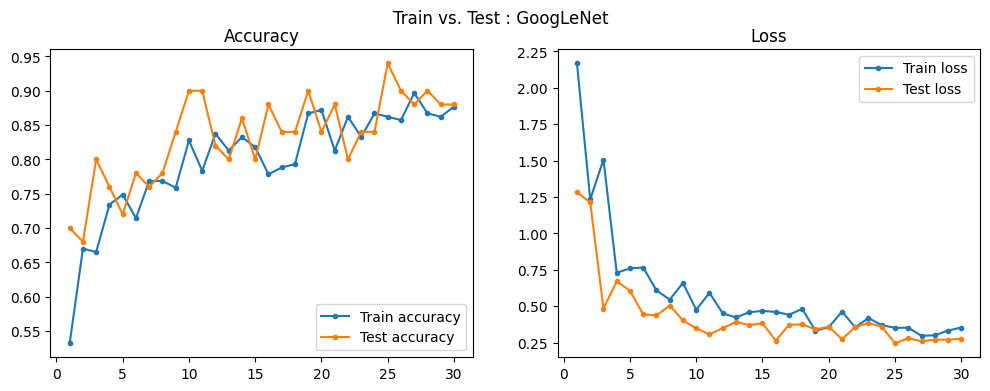

In [ ]:
# 훈련 결과 시각화
acc = lenet_history.history['accuracy']
val_acc = lenet_history.history['val_accuracy']
loss = lenet_history.history['loss']
val_loss = lenet_history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, marker='.', label='Train accuracy')
plt.plot(epochs, val_acc, marker='.', label='Test accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, marker='.', label='Train loss')
plt.plot(epochs, val_loss, marker='.', label='Test loss')
plt.title('Loss')
plt.legend()

plt.suptitle('Train vs. Test : GoogLeNet')
plt.show()

# VGGnet

깊은 합성곱 신경망이라는 의미로, 마찬가지로 합성곱 레이어와 풀링 레이어를 쌓아서 특징을 추출하고, 완전 연결 층을 사용하여 최종 예측을 수행합니다. VGG16은 16개의 레이어로 구성되어 있습니다.

In [ ]:
# VGG16 모델 불러오기
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# base 모델에 새로운 레이어 추가
x = base_model.output
x = Flatten()(x)                     # Dense layer 입력위한 1차원 평탄화
x = Dense(512, activation='relu')(x) # 512개의 뉴런 가지는 fully connected
x = Dropout(0.5)(x)                  # # 드롭아웃 비율 50%
predictions = Dense(1, activation='sigmoid')(x)

# 전체 모델 정의
model = Model(inputs=base_model.input, outputs=predictions)

# 사전 훈련된 모델의 가중치는 고정하고 새로운 층만 학습되도록 설정
for layer in base_model.layers:
    layer.trainable = False

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 최적화 설정
model_path = "./tumor_VGG16.hdf5"
checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델 훈련
vgg16_history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    epochs=e,
    callbacks=[checkpointer, early_stopping_callback]
)

Epoch 1/30
4/4 [==============================] - ETA: 0s - loss: 1.4183 - accuracy: 0.5229
Epoch 1: val_loss improved from inf to 1.02349, saving model to ./tumor_VGG16.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 3s 756ms/step - loss: 1.4183 - accuracy: 0.5229 - val_loss: 1.0235 - val_accuracy: 0.6600
Epoch 2/30
4/4 [==============================] - ETA: 0s - loss: 1.1090 - accuracy: 0.5550
Epoch 2: val_loss improved from 1.02349 to 0.51026, saving model to ./tumor_VGG16.hdf5
4/4 [==============================] - 2s 565ms/step - loss: 1.1090 - accuracy: 0.5550 - val_loss: 0.5103 - val_accuracy: 0.7400
Epoch 3/30
4/4 [==============================] - ETA: 0s - loss: 0.7189 - accuracy: 0.6471
Epoch 3: val_loss improved from 0.51026 to 0.38692, saving model to ./tumor_VGG16.hdf5
4/4 [==============================] - 2s 527ms/step - loss: 0.7189 - accuracy: 0.6471 - val_loss: 0.3869 - val_accuracy: 0.8200
Epoch 4/30
4/4 [==============================] - ETA: 0s - loss: 0.8073 - accuracy: 0.6601
Epoch 4: val_loss did not improve from 0.38692
4/4 [==============================] - 2s 433ms/step - loss: 0.8073 - accuracy: 0.6601 - val_loss: 0.4193 - val_accu

In [ ]:
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0  

In [ ]:
best_acc_vgg = max(vgg16_history.history['val_accuracy'])
print(f"googLeNet best test accuracy: {best_acc_vgg}")

googLeNet best test accuracy: 0.9200000166893005


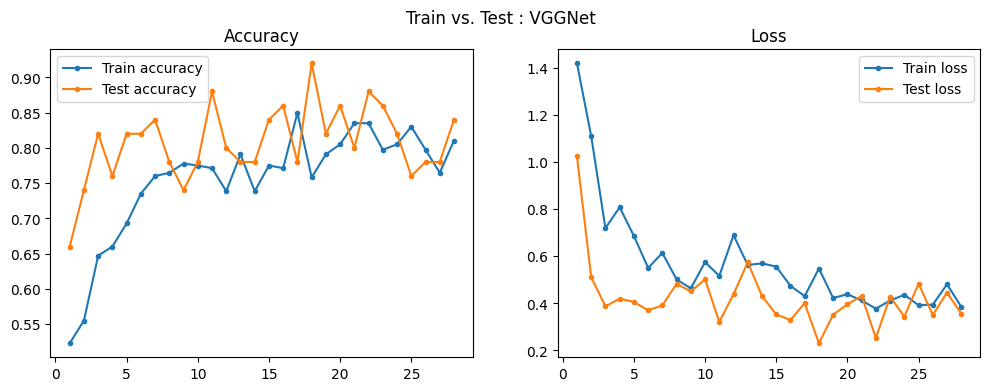

In [ ]:
# 훈련 결과 시각화
acc = vgg16_history.history['accuracy']
val_acc = vgg16_history.history['val_accuracy']
loss = vgg16_history.history['loss']
val_loss = vgg16_history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, marker='.', label='Train accuracy')
plt.plot(epochs, val_acc, marker='.', label='Test accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, marker='.', label='Train loss')
plt.plot(epochs, val_loss, marker='.', label='Test loss')
plt.title('Loss')
plt.legend()

plt.suptitle('Train vs. Test : VGGNet')
plt.show()

**6) 본인의 딥러닝 프로그래밍에 대한 자세한 설명** : 딥네트워크 구조 등

=> 각 네트워크의 코드쉘에서 주석으로 나타내었습니다.



**7) 결과에 대한 충분한 분석과 설명**

이미지 augment generator에 의해 매 검증시 테스트 데이터셋이 일정하게 적용되지는 않았지만 여러 차례의 epoch 동안의 점수를 통해 전반적인 성능을 비교할 수 있었는데,



In [ ]:
# 각 네트워크 분류 결과 분석
print(f"Basic CNN best score  : {best_acc_cnn}")
print(f"InceptionV3 best score: {best_acc_inception}")
print(f"VGG16 best score      : {best_acc_vgg}")

# 가장 높은 성능을 보인 모델 출력
best_model = max(('Basic CNN', best_acc_cnn), ('googLeNet', best_acc_inception), ('VGG16', best_acc_vgg), key=lambda x: x[1])
print(f"\nBest performing model is a {best_model[0]} with validation accuracy: {best_model[1]:.3f}")

Basic CNN best score  : 0.8199999928474426
InceptionV3 best score: 0.9399999976158142
VGG16 best score      : 0.9200000166893005

Best performing model is a googLeNet with validation accuracy: 0.940


**8) 프로젝트를 위해 활용한 자료나, 동영상 링크**
- https://blog.naver.com/siniphia/222118275636 : keras image data augmentation
- https://hyunsooworld.tistory.com/entry/Inception-v1v2v3v4%EB%8A%94-%EB%AC%B4%EC%97%87%EC%9D%B4-%EB%8B%A4%EB%A5%B8%EA%B0%80-CNN%EC%9D%98-%EC%97%AD%EC%82%AC#1._Inception_v1_(GoogLeNet) : cnn, inception
-CNN 강의교안 (4주차1차시)
-정유채 교수님 특강 교안 (11주차 1차시)
- https://eremo2002.tistory.com/57 : vgg, pretrained model


**9) 본 프로젝트를 통해 느낀 점**

합성곱 층과 풀링 층을 반복적으로 쌓아 특징을 추출하고, 완전 연결층을 통해 분류를 수행하는 가장 기본적인 CNN을 기반으로 발전한 이미지 인식 네트워크의 특징을 직접 실습해볼 수 있었고 아주 흥미로웠습니다. cnn만으로도 단순한 바이너리 분류 문제를 수행함에 있어서는 준수한 성능을 보인다는 사실이 인상깊었습니다. 물론 퀄리티가 좋은 데이터가 더 풍족했더라면 발전한 형태인 LeNet이나 VGGnet에서의 이미지분류 성능 비교를 더 눈에 띠게 할 수 있었을 것 같아 조금 아쉽지만 한편으로는 직접 증강을 통해 데이터 셋 보강을 경험해볼 수 있어 좋았습니다. 또한 Lenet에서 가장 이상적이고 안정적인 학습이 진행되는 모습 또한 인상깊습니다. 학습해야할 파라미터 수가 많아질수록 실제로 훈련에 더 많은 시간이 필요로 해짐을 경험적으로 체감하였습니다


**10) 프로젝트 수행 과정에 대한 간략한 일정 고찰**

본 과제 공지 이후 0513일 강유채 교수님 특강을 들으며 주제를 확정하였고 해당 주차의 주말에 활용 가능한 원본 이미지 데이터 셋을 찾았습니다.

0528~0601 본격적인 프로젝트 코드 작성을 시작하며 기본 CNN과 이후 등장한 다양한 네트워크를 추가 학습하며 과제를 수행하였습니다.